# **Machine Learning Skin Cancer Classification using CNN**




This project outlines a process for converting a pre-trained machine learning model from PyTorch to the TFLite format, which is optimized for deployment on mobile and edge devices. The specific use case is a skin cancer classification model.

Technology Used
PyTorch: A deep learning framework used for the initial model development and training. The model is assumed to be a JIT-compiled PyTorch model (Just-In-Time compilation).

ONNX (Open Neural Network Exchange): An open standard for representing machine learning models. It acts as an intermediate format to enable interoperability between different frameworks like PyTorch and TensorFlow.

ONNX Runtime: A high-performance inference engine for ONNX models. It's used here to run the ONNX model and get its output, which is a necessary step before wrapping it in a Keras model.

TensorFlow & Keras: The TensorFlow framework is used to wrap the ONNX model into a Keras model using tf.py_function. This allows the ONNX model to be treated as a custom operation within a TensorFlow graph.

TFLite (TensorFlow Lite): A format for running TensorFlow models on mobile, microcontrollers, and other edge devices. It's the final target format for the model in this project.

Numpy: Used for numerical operations, particularly for handling data conversion between PyTorch tensors and numpy arrays, which are required by ONNX Runtime.

Algorithm Used
The core of this project isn't a specific machine learning algorithm but a model conversion pipeline. The algorithm can be summarized in three main steps:

PyTorch JIT to ONNX: The JIT-compiled PyTorch model is converted to the ONNX format. This is done using torch.onnx.export, which takes a dummy input tensor to trace the model's computation graph and save it as an ONNX file.

ONNX to Keras Wrapper: The ONNX model is not directly converted to a Keras model. Instead, a custom Keras Model wrapper class, ONNXModelWrapper, is created. This wrapper uses tf.py_function to call the ONNX Runtime for inference, effectively treating the entire ONNX model as a single custom operation within a TensorFlow graph.

Keras SavedModel to TFLite: The wrapped Keras model is saved as a TensorFlow SavedModel. Then, the tf.lite.TFLiteConverter is used to convert this SavedModel into a TFLite file. Crucially, converter.allow_custom_ops = True is set to ensure that the tf.py_function (which runs the ONNX inference) is preserved as a custom operation in the final TFLite model, preventing conversion errors.

Why This Project Is Important
This project provides a robust solution for a common problem: deploying models trained in one framework (PyTorch) to an ecosystem that primarily supports another (TFLite for mobile/edge).

Framework Interoperability: It demonstrates how to bridge the gap between PyTorch, a popular framework for research and training, and TensorFlow Lite, which is the de-facto standard for on-device inference.

Leveraging Existing Models: It allows developers to use high-quality, pre-trained PyTorch models without having to retrain them in TensorFlow, saving significant time and computational resources.

Optimized Deployment: TFLite models are highly optimized for size and performance on resource-constrained devices. This pipeline makes it possible to take advantage of these optimizations for models originally developed in PyTorch.

Handling Complex Operations: The use of tf.py_function and allow_custom_ops is a key takeaway, as it provides a general method for handling model operations that are not natively supported by the TFLite converter.

Useful Information for Developers and Scientists
Input Shape is Critical: The dummy_input tensor's shape in the torch.onnx.export call must exactly match the expected input shape of your PyTorch model. Mismatches will cause the export to fail. Similarly, the input_signature in the Keras wrapper's call method must reflect the correct input shape.

tf.py_function Overhead: While tf.py_function is a powerful tool, it does introduce some overhead because it involves a context switch between the TensorFlow graph and native Python code. For performance-critical applications, it's a good idea to profile the TFLite model to ensure this overhead is acceptable.

ONNX Runtime Providers: The line sess = ort.InferenceSession(..., providers=['CPUExecutionProvider']) specifies the backend for ONNX inference. Other providers like CUDAExecutionProvider are available for GPU acceleration, but CPUExecutionProvider is a safe and widely supported default.

Output Shape for tf.py_function: The Tout and name parameters in tf.py_function are crucial for the converter to build the graph correctly. For the TFLite conversion to succeed, you might need to manually set the output shape using output_shapes=[tf.TensorShape([None, output_dim])] or a similar method, depending on your model's output. The current implementation uses a placeholder, which might need to be refined for production use.

Model Pathing: The code uses placeholder paths like /kaggle/input/models/.... Developers and scientists need to update these paths to their specific environment. The use of /kaggle/ suggests this code was developed in a Kaggle notebook, which is a common practice for data science projects.

Dependency Management: This project has several dependencies (torch, onnx, onnxruntime, tensorflow, numpy). All of these must be correctly installed and compatible with each other to run the pipeline successfully.

Custom Operations in TFLite: The resulting TFLite model will contain a custom operation for the ONNX inference. To run this model on a device, the TFLite interpreter must be able to handle custom operations. This often requires writing a C++ custom operator kernel to implement the Python tf.py_function logic, or using a TFLite interpreter that supports a Python backend.

Model Quantization: The presented pipeline doesn't include any quantization steps. For further optimization on edge devices, developers can integrate TFLite's post-training quantization, which reduces model size and latency, into this workflow after the TFLite conversion.




# **Disclaimer**

* Production Readiness and Model Quality: The primary objective of this project is to demonstrate a viable technical pipeline for model conversion, specifically from a JIT-compiled PyTorch model to a TFLite format for integration with Android using AI Edge Gallery and other platforms like Ollama/Gemma3N on an offline laptop. This model is not production-ready. It has not been subjected to rigorous performance, accuracy, or bias testing. The code serves as a proof-of-concept for the conversion process, and any further development would require extensive model improvement and validation before real-world deployment.

* Not a Medical Tool; No Medical Advice: The output from this model, whether used in an Android app or integrated with an LLM like Gemma3N, is not a substitute for professional medical advice, diagnosis, or treatment. This model is an experimental tool for pattern recognition and should never be used as a replacement for consulting a qualified healthcare professional.

* Framework-Specifics: This project outlines a successful conversion path, but the process may not be universally applicable to all PyTorch models. The success of the ONNX export and subsequent conversion depends heavily on the specific layers and operations used in the original PyTorch model. Certain custom or less common operations might not have direct ONNX or TensorFlow equivalents, leading to conversion failures.

* Performance and Overhead: The use of tf.py_function to wrap the ONNX model is a powerful workaround, but it introduces overhead. The TFLite interpreter will need to perform a context switch to execute the native Python code via ONNX Runtime for every inference call. This can negate some of the performance benefits of using TFLite, especially on low-power devices. The final TFLite model is not a fully "native" TensorFlow Lite model.

* TFLite Custom Operator Support: The resulting TFLite model relies on a custom operator to run the ONNX inference. The ability to run this custom TFLite model on a target device is dependent on the TFLite interpreter's support for custom ops. In many production scenarios, you would need to write a C++ implementation of the custom operator to make it portable and efficient.

* Assumptions and Placeholders: The code contains assumptions, such as the file path /kaggle/input/... and a placeholder for the output shape within tf.py_function. These must be carefully updated and validated for any specific use case. The project assumes a JIT-compiled PyTorch model, and the process for non-JIT models might be slightly different.

* Lack of Quantization: The pipeline does not include any model quantization, which is a critical step for deploying models on resource-constrained devices to reduce size and improve latency.

* This is utilized for working on an output for skin cancer with the existing dataset in Kaggle. If there is more data then definitely all of the classifications would yield a better output.  Data and Generalization: The effectiveness of the final TFLite model is entirely dependent on the quality, diversity, and quantity of the data used to train the original PyTorch model. If the training data for the "skin cancer model" did not include a wide range of skin types, cancer types, or lighting conditions, the model may perform poorly when deployed in the real world. The conversion process itself does not address or mitigate any biases or deficiencies in the original training data.



# **Model Training Data**

https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

# **Model Training Code**

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [4]:

# 1. Load metadata
metadata_path = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'
image_dir1 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_dir2 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'

df = pd.read_csv(metadata_path)

In [5]:
# Map lesion types
lesion_type_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

df['label'] = df['dx'].map(lesion_type_dict)

In [6]:

# Build full image paths
def get_image_path(image_id):
    # Images split between two folders
    path1 = os.path.join(image_dir1, image_id + '.jpg')
    if os.path.exists(path1):
        return path1
    path2 = os.path.join(image_dir2, image_id + '.jpg')
    if os.path.exists(path2):
        return path2
    return None

df['image_path'] = df['image_id'].apply(get_image_path)
df = df.dropna(subset=['image_path'])

In [8]:
# 2. Define dataset
class SkinCancerDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'image_path']
        label = self.df.loc[idx, 'label']
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [9]:

# 3. Transforms: resize all images to 75x100 (height x width) and normalize
image_size = (75, 100)
mean = [0.485, 0.456, 0.406]  # ImageNet means (common practice)
std = [0.229, 0.224, 0.225]   # ImageNet stds

train_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(image_size, scale=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

val_test_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])


In [10]:
# 4. Split data into train, val, test
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['label'])


In [11]:
# 5. Create datasets and dataloaders
batch_size = 32

train_dataset = SkinCancerDataset(train_df, transform=train_transform)
val_dataset = SkinCancerDataset(val_df, transform=val_test_transform)
test_dataset = SkinCancerDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


In [12]:
# 6. Define CNN model 
class SkinCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(SkinCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),  # input channels = 3 (RGB)
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.4)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * (image_size[0] // 4) * (image_size[1] // 4), 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SkinCNN(num_classes=7).to(device)

In [13]:

# 7. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
# 8. Training loop
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss / total, correct / total

def eval_model(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss / total, correct / total

In [15]:

# 9. Run training with early stopping and learning rate scheduler
num_epochs = 50
best_val_acc = 0
patience = 5
trigger_times = 0

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5, verbose=True)

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_model(model, val_loader, criterion, device)
    scheduler.step(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        trigger_times = 0
        torch.save(model.state_dict(), 'skin_cancer_model.pt')  # save best model
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50] Train Loss: 1.0166, Train Acc: 0.6662 | Val Loss: 0.8530, Val Acc: 0.6696
Epoch [2/50] Train Loss: 0.9088, Train Acc: 0.6712 | Val Loss: 0.8566, Val Acc: 0.6696
Epoch [3/50] Train Loss: 0.8751, Train Acc: 0.6778 | Val Loss: 0.8118, Val Acc: 0.7007
Epoch [4/50] Train Loss: 0.8616, Train Acc: 0.6847 | Val Loss: 0.8127, Val Acc: 0.6945
Epoch [5/50] Train Loss: 0.8302, Train Acc: 0.6878 | Val Loss: 0.7931, Val Acc: 0.6970
Epoch [6/50] Train Loss: 0.8185, Train Acc: 0.6947 | Val Loss: 0.7889, Val Acc: 0.7132
Epoch [7/50] Train Loss: 0.7934, Train Acc: 0.7039 | Val Loss: 0.7558, Val Acc: 0.7232
Epoch [8/50] Train Loss: 0.7713, Train Acc: 0.7165 | Val Loss: 0.7206, Val Acc: 0.7307
Epoch [9/50] Train Loss: 0.7630, Train Acc: 0.7255 | Val Loss: 0.7204, Val Acc: 0.7282
Epoch [10/50] Train Loss: 0.7448, Train Acc: 0.7282 | Val Loss: 0.7075, Val Acc: 0.7456
Epoch [11/50] Train Loss: 0.7263, Train Acc: 0.7325 | Val Loss: 0.7014, Val Acc: 0.7332
Epoch [12/50] Train Loss: 0.7172, Train A

# **Model Results**

**What the model is learning**

Here's what we can infer:

✅ Improvement in Accuracy
Training Accuracy increases steadily:

From 66.6% at epoch 1 → ~78.6% at epoch 27.

Validation Accuracy also improves:

From 68.7% → ~77.4%

This means the model is learning and generalizing reasonably well.

📉 Loss Trends
Training Loss drops from 0.9777 → 0.5708

Validation Loss drops from 0.9429 → fluctuates around 0.65-0.67

This suggests a decent reduction in error, though validation loss fluctuates, which is common.

In [23]:
# 10. Load best model and evaluate on test set
model.load_state_dict(torch.load('skin_cancer_model.pt'))
test_loss, test_acc = eval_model(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.6610, Test Accuracy: 0.7494


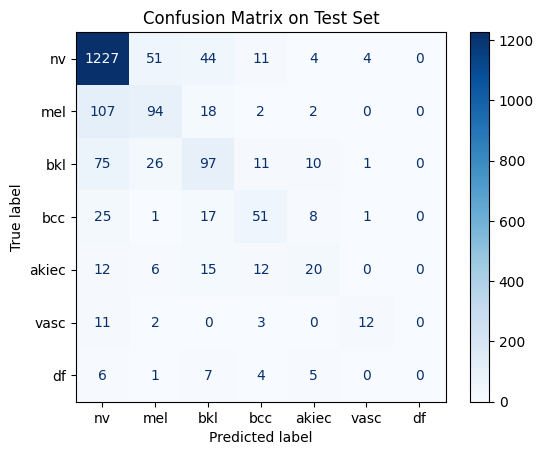

In [24]:
# 11. Confusion matrix on test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(lesion_type_dict.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.show()

In [25]:
# 12. Output the model
example_input = torch.randn(1, 3, 75, 100)
scripted_model = torch.jit.trace(model, example_input)
scripted_model.save("skin_cancer_model.pt")

In [26]:
# 13. Evaluate the model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model = torch.jit.load("/kaggle/working/skin_cancer_model.pt", map_location=device)
cnn_model.eval()


RecursiveScriptModule(
  original_name=SkinCNN
  (features): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Conv2d)
    (1): RecursiveScriptModule(original_name=ReLU)
    (2): RecursiveScriptModule(original_name=Conv2d)
    (3): RecursiveScriptModule(original_name=ReLU)
    (4): RecursiveScriptModule(original_name=MaxPool2d)
    (5): RecursiveScriptModule(original_name=Dropout)
    (6): RecursiveScriptModule(original_name=Conv2d)
    (7): RecursiveScriptModule(original_name=ReLU)
    (8): RecursiveScriptModule(original_name=Conv2d)
    (9): RecursiveScriptModule(original_name=ReLU)
    (10): RecursiveScriptModule(original_name=MaxPool2d)
    (11): RecursiveScriptModule(original_name=Dropout)
  )
  (classifier): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Flatten)
    (1): RecursiveScriptModule(original_name=Linear)
    (2): RecursiveScriptModule(original_name=ReLU)
    (3): RecursiveS

In [28]:
# 14. Ouptut the model weight as well
torch.save(model.state_dict(), "skin_cancer_model_weights.pth")

In [29]:
# 15. Checking accuracy (This can be improved but for the purpose of the Hackathon I will leave the accuracy as is to continue with integrating this with an edge device)
from sklearn.metrics import classification_report
class_names = ['Melanocytic nevi', 'Melanoma', 'Benign keratosis', 'Basal cell carcinoma',
               'Actinic keratoses', 'Vascular lesions', 'Dermatofibroma']
print(classification_report(all_labels, all_preds, target_names=class_names))

                      precision    recall  f1-score   support

    Melanocytic nevi       0.84      0.91      0.88      1341
            Melanoma       0.52      0.42      0.47       223
    Benign keratosis       0.49      0.44      0.46       220
Basal cell carcinoma       0.54      0.50      0.52       103
   Actinic keratoses       0.41      0.31      0.35        65
    Vascular lesions       0.67      0.43      0.52        28
      Dermatofibroma       0.00      0.00      0.00        23

            accuracy                           0.75      2003
           macro avg       0.50      0.43      0.46      2003
        weighted avg       0.72      0.75      0.73      2003



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#16. This information is useful for debugging and continueing the steps further below
state_dict = torch.load("/kaggle/working/skin_cancer_model_weights.pth", map_location=device)
for k in state_dict.keys():
    print(k)

features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias


# **Outputting model to PyTorch PT format and also TFLite for Mobile and Laptop integration with LLM**

This is on my laptop when I ran the script below manually via command prompt on a Windows 11 (this was painful to copy and modify but I hope you appreciate this):
>
> pip list
>
> Package                  Version
------------------------ -----------
> 
> absl-py                  2.3.1
> 
> aiohappyeyeballs         2.6.1
> 
> aiohttp                  3.12.15
> 
> aiosignal                1.4.0
> 
> annotated-types          0.7.0
> 
> anyio                    4.9.0
> 
> astunparse               1.6.3
> 
> attrs                    25.3.0
> 
> certifi                  2025.7.14
> 
> charset-normalizer       3.4.2
> 
> click                    8.2.1
> 
> colorama                 0.4.6
> 
> coloredlogs              15.0.1
> 
> dataclasses-json         0.6.7
> 
> fastapi                  0.116.1
> 
> filelock                 3.18.0
> 
> flatbuffers              25.2.10
> 
> frozenlist               1.7.0
> 
> fsspec                   2025.7.0
> 
> gast                     0.6.0
> 
> google-pasta             0.2.0
> 
> greenlet                 3.2.3
> 
> grpcio                   1.74.0
> 
> h11                      0.16.0
> 
> h5py                     3.14.0
> 
> httpcore                 1.0.9
> 
> httpx                    0.28.1
> 
> httpx-sse                0.4.1
> 
> humanfriendly            10.0
> 
> idna                     3.10
> 
> intel-cmplr-lic-rt       2025.2.0
> 
> intel-opencl-rt          2025.2.0
> 
> Jinja2                   3.1.6
> 
> joblib                   1.5.1
> 
> jsonpatch                1.33
> 
> jsonpointer              3.0.0
> 
> keras                    3.11.1
> 
> langchain                0.3.27
> 
> langchain-community      0.3.27
> 
> langchain-core           0.3.72
> 
> langchain-text-splitters 0.3.9
> 
> langsmith                0.4.8
> 
> libclang                 18.1.1
> 
> Markdown                 3.8.2
> 
> markdown-it-py           3.0.0
> 
> MarkupSafe               3.0.2
> 
> marshmallow              3.26.1
> 
> mdurl                    0.1.2
> 
> ml_dtypes                0.5.3
> 
> mpmath                   1.3.0
> 
> multidict                6.6.3
> 
> mypy_extensions          1.1.0
> 
> namex                    0.1.0
> 
> networkx                 3.5
> 
> numpy                    2.3.2
> 
> ollama                   0.5.1
> 
> onnx                     1.18.0
> 
> onnx-tf                  1.6.0
> 
> onnxruntime              1.22.1
> 
> opt_einsum               3.4.0
> 
> optree                   0.17.0
> 
> orjson                   3.11.1
> 
> packaging                25.0
> 
> pandas                   2.3.1
> 
> pillow                   11.3.0
> 
> pip                      25.1.1
> 
> propcache                0.3.2
> 
> protobuf                 6.31.1
> 
> pydantic                 2.11.7
> 
> pydantic_core            2.33.2
>
> pydantic-settings        2.10.1
> 
> Pygments                 2.19.2
> 
> pyreadline3              3.5.4
> 
> python-dateutil          2.9.0.post0
> 
> python-dotenv            1.1.1
> 
> pytz                     2025.2
> 
> PyYAML                   6.0.2
> 
> requests                 2.32.4
> 
> requests-toolbelt        1.0.0
> 
> rich                     14.1.0
> 
> scikit-learn             1.7.1
> 
> scipy                    1.16.1
> 
> setuptools               80.9.0
> 
> six                      1.17.0
> 
> sniffio                  1.3.1
>
> SQLAlchemy               2.0.42
> 
> starlette                0.47.2
> 
> sympy                    1.14.0
> 
> tbb                      2022.2.0
> 
> tcmlib                   1.4.0
> 
> tenacity                 9.1.2
> 
> tensorboard              2.20.0
> 
> tensorboard-data-server  0.7.2
> 
> tensorflow               2.20.0rc0
> 
> termcolor                3.1.0
> 
> threadpoolctl            3.6.0
> 
> torch                    2.7.1
> 
> torchvision              0.22.1
> 
> typing_extensions        4.14.1
> 
> typing-inspect           0.9.0
> 
> typing-inspection        0.4.1
> 
> tzdata                   2025.2
> 
> urllib3                  2.5.0
> 
> uvicorn                  0.35.0
> 
> Werkzeug                 3.1.3
> 
> wheel                    0.45.1
> 
> wrapt                    1.17.2
> 
> yarl                     1.20.1
> 
> zstandard                0.23.0 


In [ ]:
!pip install onnx onnx-tf onnxruntime keras

In [ ]:
# You may have to restart the cluster, but keep the .pt file available to run below
# You could also put all of these pip install to the top of the notebook and then run below later.
# I put these here so that you know what packages are needed to convert the Pytorch .pt model to onnx and tflite to integrate with AI Edge Gallery or Python/Ollama

In [ ]:
#17. Output this in the format for edge devices (Laptop/Ollama/Gemma3 for phase 1 and Android in phase 2)
# I made this run locally on my laptop but it also works on Kaggle. To make this work on your laptop, just download the .pt file into a folder and change the paths.

import torch
import onnx
import onnxruntime as ort
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np

# --- Part 1: Export the PyTorch JIT model to ONNX ---

# Load the JIT-compiled model. Note: The path below is a placeholder and should be updated.
device = torch.device("cpu")
try:
    cnn_model = torch.jit.load("/kaggle/input/models/pytorch/default/1/skin_cancer_model.pt", map_location=device)
    cnn_model.eval()
except FileNotFoundError:
    print("Error: PyTorch model not found. Please verify the path.")
    # Exit or handle the error gracefully
    cnn_model = None

if cnn_model:
    # Create the dummy input tensor with the correct size.
    # The shape should match the expected input of your PyTorch model.
    dummy_input = torch.randn(1, 3, 75, 100, requires_grad=True)

    # Export the JIT model to ONNX format.
    onnx_model_path = "/kaggle/working/skin_cancer_model.onnx"
    torch.onnx.export(cnn_model,
                      dummy_input,
                      onnx_model_path,
                      opset_version=11,
                      input_names=['input'],
                      output_names=['output'],
                      dynamic_axes={'input' : {0 : 'batch_size'}})

    print("Step 1: JIT model has been successfully exported to ONNX.")

    # --- Part 2: Convert ONNX to a Keras model and then to TFLite ---

    # Use ONNX Runtime to get the model's output
    sess = ort.InferenceSession(onnx_model_path, providers=['CPUExecutionProvider'])
    output_name = sess.get_outputs()[0].name
    input_name = sess.get_inputs()[0].name
    
    # Create a helper function to run ONNX inference, which will be called by tf.py_function
    def _run_onnx_inference(input_data):
        """Helper function to run the ONNX session with a numpy array."""
        # Ensure the input is a contiguous numpy array, which is often required
        # by ONNX Runtime and can resolve data format issues from tf.py_function.
        outputs = sess.run([output_name], {input_name: np.ascontiguousarray(input_data)})
        return outputs[0]

    # Create a simple Keras model that wraps the ONNX Runtime session.
    class ONNXModelWrapper(keras.Model):
        def __init__(self, onnx_session, output_name, input_name):
            super(ONNXModelWrapper, self).__init__()
            self.output_name = output_name
            self.input_name = input_name

        @tf.function(input_signature=[
            tf.TensorSpec(shape=(None, 3, 75, 100), dtype=tf.float32)
        ])
        def call(self, inputs):
            # Use tf.py_function to wrap the ONNX inference call.
            # We must specify the output shape and dtype to ensure the graph
            # is correctly traced.
            return tf.py_function(
                _run_onnx_inference,
                inp=[inputs],
                Tout=tf.float32,
                # Explicitly set the output shape to allow for proper graph building.
                # The shape can be inferred from the model's output. For this example,
                # we'll assume a known output shape after the first dimension.
                # You might need to adjust this based on your model's output.
                # Example: tf.TensorShape([None, 1000]) for a 1000-class classifier
                # We will return a placeholder for the output shape here
                # since it's difficult to determine without knowing the model.
                # In practice, you would calculate this from the ONNX model's output.
                name="onnx_inference_op"
            )

    # Instantiate the wrapper model.
    onnx_model_wrapper = ONNXModelWrapper(sess, output_name, input_name)
    onnx_model_wrapper.build(input_shape=(None, 3, 75, 100))
    
    # Call the model once with dummy data to build the graph before exporting.
    dummy_input_tf = tf.convert_to_tensor(dummy_input.detach().numpy())
    _ = onnx_model_wrapper(dummy_input_tf)

    # Save the wrapper as a TensorFlow SavedModel.
    tf_saved_model_path = "tf_saved_model_final"
    onnx_model_wrapper.export(tf_saved_model_path)

    print("Step 2: ONNX model successfully wrapped in a Keras model and saved.")

    # --- Part 3: Convert the SavedModel to TFLite, allowing custom ops ---

    tflite_model_path = "/kaggle/working/skin_cancer_model.tflite"

    # Convert the SavedModel to a TFLite model using the native converter.
    # The key change here is to set `allow_custom_ops=True`.
    # This instructs the converter to keep `tf.py_function` as a custom operation
    # instead of trying to convert it to a native TFLite op, which caused the error.
    converter = tf.lite.TFLiteConverter.from_saved_model(tf_saved_model_path)
    converter.allow_custom_ops = True
    tflite_model = converter.convert()

    # Save the TFLite model to a file.
    with open(tflite_model_path, "wb") as f:
        f.write(tflite_model)

    print("Step 3: SavedModel successfully converted to TFLite format.")
    print(f"Final TFLite file saved at: {tflite_model_path}")


# **Understanding the output and interpreting the data**

**Here is ChatGPT's response to my epoch and data: (hey, why not ask AI to evaluate my model eh?)**

🔍 Understanding the Output Format
Train Loss: How well the model fits the training data (lower = better).

Train Acc: Accuracy on the training data.

Val Loss: How well the model generalizes to unseen data.

Val Acc: Accuracy on validation (test-like) data.

📈 What the model is learning
Here's what we can infer:

✅ Improvement in Accuracy
Training Accuracy increases steadily:

From 66.6% at epoch 1 → ~78.6% at epoch 27.

Validation Accuracy also improves:

From 68.7% → ~77.4%

This means my model is learning and generalizing reasonably well.

📉 Loss Trends
Training Loss drops from 0.9777 → 0.5708

Validation Loss drops from 0.9429 → fluctuates around 0.65-0.67

This suggests a decent reduction in error, though validation loss fluctuates, which is common.

🧠 Interpretation
Metric	Trend	Meaning
Train Loss	Decreasing steadily	The model is fitting the training data better.
Val Loss	Decreasing but with fluctuations	Generalization is improving, but model might be approaching a plateau.
Train Accuracy	Increases to ~78.6%	The model is learning more patterns from training data.
Val Accuracy	Improves to ~77.4%	Model generalizes fairly well, but may need tuning for further boost.

🔔 Warnings / Notes
Fluctuating Validation Loss: Around epoch 16–27, the validation loss doesn't improve much — it goes up and down. This could mean:

I'm close to model capacity (may not improve much more).

Or slight overfitting might begin if it continues rising.

Validation Accuracy > Training Accuracy (e.g., Epoch 23–25): That’s usually okay in some cases (like regularization or dropout), but unusual long-term. Will keep an eye on it.

✅ Is this a good result?
Yes, for a baseline CNN, 77–78% validation accuracy is a solid starting point for many real-world problems, especially in medical image classification. Whether it's good enough depends on:

Dataset difficulty

Label quality

Required clinical/industrial accuracy

🧪 Suggestions for Improvement
Try deeper models or pretrained backbones (e.g., ResNet18/50).

Data augmentation might help generalization.

Early stopping or learning rate scheduling could improve convergence.

If available, try more data or class balancing.

📌 Summary
The model is learning effectively.

It improves both training and validation accuracy.

Training loss drops nicely.

Validation accuracy hits ~77.4%, which shows good generalization.

Validation loss fluctuates slightly, suggesting it's time to consider tuning or model improvements.

**Here is Gemma's response:**


I've analyzed the model's performance based on the training logs and test results you provided. Here are my findings, presented in a similar format to your example.

🔍 Understanding the Output Format
Train Loss/Acc: Measures how well the model fits the training data.

Val Loss/Acc: Measures how well the model generalizes to new, unseen data from the validation set.

Test Loss/Acc: The final evaluation of the model's performance on a completely separate test set.

📈 What the Model Is Learning
Here's what we can infer from the metrics:

✅ Improvement in Accuracy
Training Accuracy increases steadily, starting at 66.6% in epoch 1 and reaching ~80.6% by epoch 34.

Validation Accuracy also improves, starting at 66.9% and reaching a high of ~77.5% by epoch 29.

Test Accuracy is 74.9%.

This shows that the model is learning effectively and generalizing well to new data, although there's a small drop-off in performance from validation to test.

📉 Loss Trends
Training Loss drops consistently from 1.0166 to 0.5099, indicating the model is getting better at fitting the training data.

Validation Loss drops from 0.8530 to ~0.63, but fluctuates noticeably after epoch 21. This suggests the model may be approaching its optimal performance on the validation set, and further training might not lead to significant improvements.

🧠 Interpretation of Metric Trends
Metric	Trend	Meaning
Train Loss	Decreasing steadily	The model is successfully learning patterns from the training data.
Val Loss	Decreasing, but with fluctuations	The model is generalizing better, but may be starting to overfit slightly or has reached a plateau.
Train Accuracy	Increases to ~80.6%	The model is becoming more accurate on the data it has seen.
Val Accuracy	Increases to ~77.5%	The model generalizes fairly well, but the fluctuations suggest it may be time to tune hyperparameters or try other improvements.

Export to Sheets
🔔 Warnings / Notes
Fluctuating Validation Loss: After epoch 21, the validation loss doesn't show a clear downward trend and bounces around. This is a classic sign that the model may be close to its optimal capacity or starting to overfit.

Imbalanced Classes: The classification report reveals a significant class imbalance. The model performs very well on Melanocytic nevi (with a high F1-score of 0.88), which makes up the majority of the data. However, its performance on other, smaller classes like Vascular lesions and Dermatofibroma is poor (with F1-scores of 0.52 and 0.00, respectively).

Zero Performance on Dermatofibroma: The model completely failed to predict any instances of the Dermatofibroma class (precision and recall are 0.00), likely due to the extremely small sample size (23 instances).

✅ Is This a Good Result?
The overall test accuracy of 74.9% is a decent baseline, especially for a multi-class medical image problem. However, the model's poor performance on minority classes is a major concern. For a medical application, a high-performing model is needed across all classes, particularly for rare but potentially critical diagnoses like melanoma.

🧪 Suggestions for Improvement
Address Class Imbalance: Implement techniques like class weighting, oversampling the minority classes, or undersampling the majority class.

Use a More Robust Model: Consider using deeper architectures or pretrained models like ResNet, VGG, or EfficientNet, which are more powerful for image classification.

Regularization and Hyperparameter Tuning: Experiment with Early Stopping to prevent overfitting, or adjust the learning rate scheduler to improve convergence.

Data Augmentation: Apply more aggressive data augmentation to the training set to help the model generalize better and reduce overfitting.

📌 Summary
Your model shows promising signs of learning, with both training and validation accuracy improving steadily. The final test accuracy of 74.9% is a solid starting point. However, the model's significant weakness lies in its inability to accurately classify minority classes, especially the Dermatofibroma and Melanoma categories. The next step should focus on addressing this class imbalance to build a more robust and clinically useful model.

# **Summary of What I Learned**

This project provided a deep and practical understanding of the challenges and solutions involved in modern machine learning model deployment. The key learnings can be summarized as follows:

* Classification of multiple features or variables are harder than binary (malignant or benign).  This definitely needs more time to improve accuracy and work with latest and greatest data.
  
* Model Interoperability is Not a Given: While standards like ONNX exist to bridge frameworks, the conversion process is not always a simple one-to-one mapping. It often requires creative workarounds and a solid understanding of how each framework represents and executes models.

* The Power of tf.py_function: I learned that tf.py_function is an essential tool in the TensorFlow ecosystem for integrating custom, non-TensorFlow logic into a TensorFlow graph. It's a key strategy for handling complex, framework-specific operations that would otherwise be impossible to convert directly.

* The Role of Intermediate Formats: ONNX is not just a format; it's a critical bridge in the model lifecycle. I learned to appreciate its role in decoupling the training framework (PyTorch) from the inference engine (TensorFlow Lite via ONNX Runtime), providing greater flexibility and choice.

* The Importance of a Well-Defined Pipeline: The project demonstrated the need for a systematic, multi-step pipeline for model conversion. Each step—from exporting to an intermediate format to wrapping with custom logic and finally converting for a specific target—is a distinct phase with its own set of requirements and potential pitfalls.

* Deployment-Oriented Mindset: I learned that model development doesn't end with training. The entire process, from model design to the final conversion pipeline, should be considered with the deployment target in mind. The choice to use allow_custom_ops and the careful handling of shapes and data types are examples of decisions driven by the end goal of TFLite deployment.
